In [1]:
import pvl
import struct
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os.path
import binascii

In [2]:
lo_file = '/home/arsanders/testData/lo/case03/input/3083_med_tohi_isis2.cub'

In [3]:
header = pvl.load(lo_file)

In [4]:
header

PVLModule([
  ('CCSD3ZF0000100000001NJPL3IF0PDS200000001', 'SFDU_LABEL')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 512)
  ('FILE_RECORDS', 167)
  ('LABEL_RECORDS', 25)
  ('FILE_STATE', 'CLEAN')
  ('^HISTORY', 26)
  ('HISTORY', PVLObject([]))
  ('^QUBE', 148)
  ('QUBE',
   {'AXES': 3,
    'AXIS_NAME': ['SAMPLE', 'LINE', 'BAND'],
    'BAND_BIN': {'BAND_BIN_CENTER': 1.0,
                 'BAND_BIN_ORIGINAL_BAND': 1,
                 'BAND_BIN_UNIT': 'NONE'},
    'CORE_BASE': 0.0,
    'CORE_HIGH_INSTR_SATURATION': 255,
    'CORE_HIGH_REPR_SATURATION': 255,
    'CORE_ITEMS': [100, 100, 1],
    'CORE_ITEM_BYTES': 1,
    'CORE_ITEM_TYPE': 'PC_UNSIGNED_INTEGER',
    'CORE_LOW_INSTR_SATURATION': 0,
    'CORE_LOW_REPR_SATURATION': 0,
    'CORE_MULTIPLIER': 1.0,
    'CORE_NAME': 'RAW_DATA_NUMBER',
    'CORE_NULL': 0,
    'CORE_UNIT': 'NONE',
    'CORE_VALID_MINIMUM': 1,
    'IMAGE_NUMBER': '308300',
    'ISIS_GEOMETRY': {'BASE_KERNELS': ['/usgs/cpkgs/isis2/lsb/isisd/data/mk98264a.tls',

In [5]:
with open(lo_file, 'rb') as f:
    image_offset = (header["^QUBE"]-1)* header["RECORD_BYTES"]
    f.seek(image_offset)
    b_image_data = f.read()

In [6]:
n_lines = 5
line_length = header['QUBE']['CORE_ITEMS'][0] * (header['QUBE']['CORE_ITEM_BYTES'])

In [7]:
image_data = []
for j in range(n_lines):
    image_sample = np.frombuffer(b_image_data[j*line_length:(j+1)*line_length], dtype=np.uint8, count=int(line_length))
    image_data.append(image_sample)
image_data = np.array(image_data)

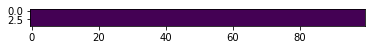

In [8]:
plt.imshow(image_data)

In [9]:
image_fn, image_ext = os.path.splitext(lo_file)
mini_image_fn = image_fn + crop + image_ext
mini_image_bn = os.path.basename(mini_image_fn)

grammar = pvl.grammar.ISISGrammar()
grammar.comments+=(("#", "\n"), )
encoder = pvl.encoder.ISISEncoder()


# Overwrite the number of lines in the label
header['^QUBE'] = pvl.collections.Units(len(pvl.dumps(header, encoder=encoder, grammar=grammar)), 'BYTES')
header['QUBE']['CORE_ITEMS'][1] = n_lines

In [10]:
label_fn, label_ext = os.path.splitext(lo_file)
out_label = label_fn + crop + label_ext

pvl.dump(header, out_label, encoder=encoder, grammar=grammar)

NameError: name 'crop' is not defined

In [ ]:
with open(mini_image_fn, 'ab+') as f:
    b_reduced_image_data = image_data.tobytes()
    f.seek(0, 2)
    f.write(b'\n')
    f.write(b_reduced_image_data)